In [35]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
import yfinance as yf
import datetime as dt
from datetime import date, timedelta
import plotly.graph_objects as go
import plotly.express as px

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [36]:
today=date.today()
today

datetime.date(2024, 2, 18)

In [37]:
end_date = today.strftime("%Y-%m-%d")
start_date = today - timedelta(days=365)
start_date = start_date.strftime("%Y-%m-%d")
print("Your data will fall within the following dates: ", start_date," | ", end_date)

Your data will fall within the following dates:  2023-02-18  |  2024-02-18


In [38]:

GOOGL_df = yf.download('GOOGL', start=start_date, end=end_date, progress=False)
GOOGL_df.insert(0,'Date',GOOGL_df.index,True)
GOOGL_df.reset_index(drop=True,inplace=True)

In [39]:
GOOGL_df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,250,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,2023-08-19 10:27:50.400000,124.994680,126.453720,123.857840,125.214800,125.214800,3.089398e+07
min,2023-02-21 00:00:00,89.330002,89.889999,88.580002,89.129997,89.129997,1.251430e+07
25%,2023-05-19 18:00:00,117.392498,120.092499,116.535000,118.487497,118.487497,2.388792e+07
50%,2023-08-19 12:00:00,129.220001,130.559998,128.209999,129.334999,129.334999,2.781760e+07
75%,2023-11-15 18:00:00,136.282494,137.615002,135.132496,136.477501,136.477501,3.513925e+07
max,2024-02-16 00:00:00,152.800003,153.779999,151.429993,153.509995,153.509995,8.436620e+07
std,NaN,15.269427,15.235250,15.184332,15.198765,15.198765,1.098579e+07


In [40]:
GOOGL_df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [41]:
fig = px.line(GOOGL_df, x='Date', y=GOOGL_df.columns.drop('Date'), title='Stock Price')
fig.show()

In [42]:
GOOGL_df = GOOGL_df[['Date', 'Close']]
GOOGL_df.head()

,Date,Close
0,2023-02-21,91.790001
1,2023-02-22,91.650002
2,2023-02-23,90.889999
3,2023-02-24,89.129997
4,2023-02-27,89.870003


In [43]:
fig=px.line(GOOGL_df,x='Date',y='Close')
fig.show()

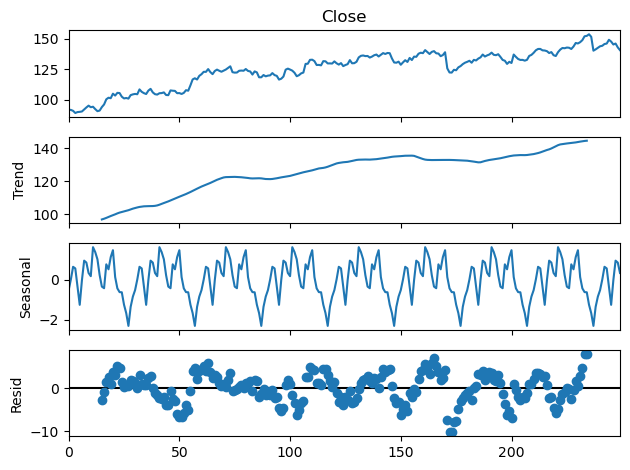

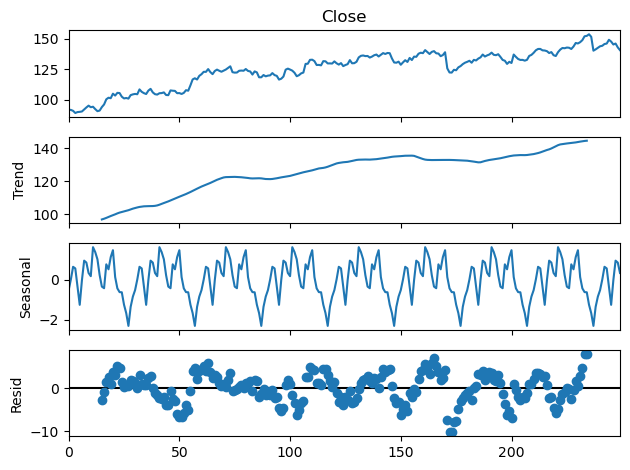

In [44]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(GOOGL_df['Close'], model='additive', period=30)
decompose.plot()

In [45]:

from pmdarima.arima import auto_arima
model = auto_arima(GOOGL_df['Close'], start_p=1, start_q=1, max_p=2, max_q=2, m=12, start_P=0, seasonal=True, d=1, D=1, trace=True, error_action='ignore', suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=7.20 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1224.066, Time=0.07 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1139.954, Time=0.38 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=3.93 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1225.527, Time=0.23 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1126.234, Time=1.53 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=19.68 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=8.05 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1124.235, Time=0.98 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=1137.986, Time=0.32 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=18.55 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=2.97 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1126.234, Time=0.97 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1128.235, Time=1.80 sec
 ARIMA(0,1,0)(2,1,0)[12] intercept   : AIC=1126

In [46]:
print(model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  250
Model:             SARIMAX(0, 1, 0)x(2, 1, 0, 12)   Log Likelihood                -559.117
Date:                            Sun, 18 Feb 2024   AIC                           1124.235
Time:                                    22:17:07   BIC                           1134.639
Sample:                                         0   HQIC                          1128.428
                                            - 250                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.7109      0.054    -13.181      0.000      -0.817      -0.605
ar.S.L24      -0.2636      0.050   